<a href="https://colab.research.google.com/github/sofiaortman/IA/blob/main/Copia_de_Reg_lineal_y_logistica_listo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

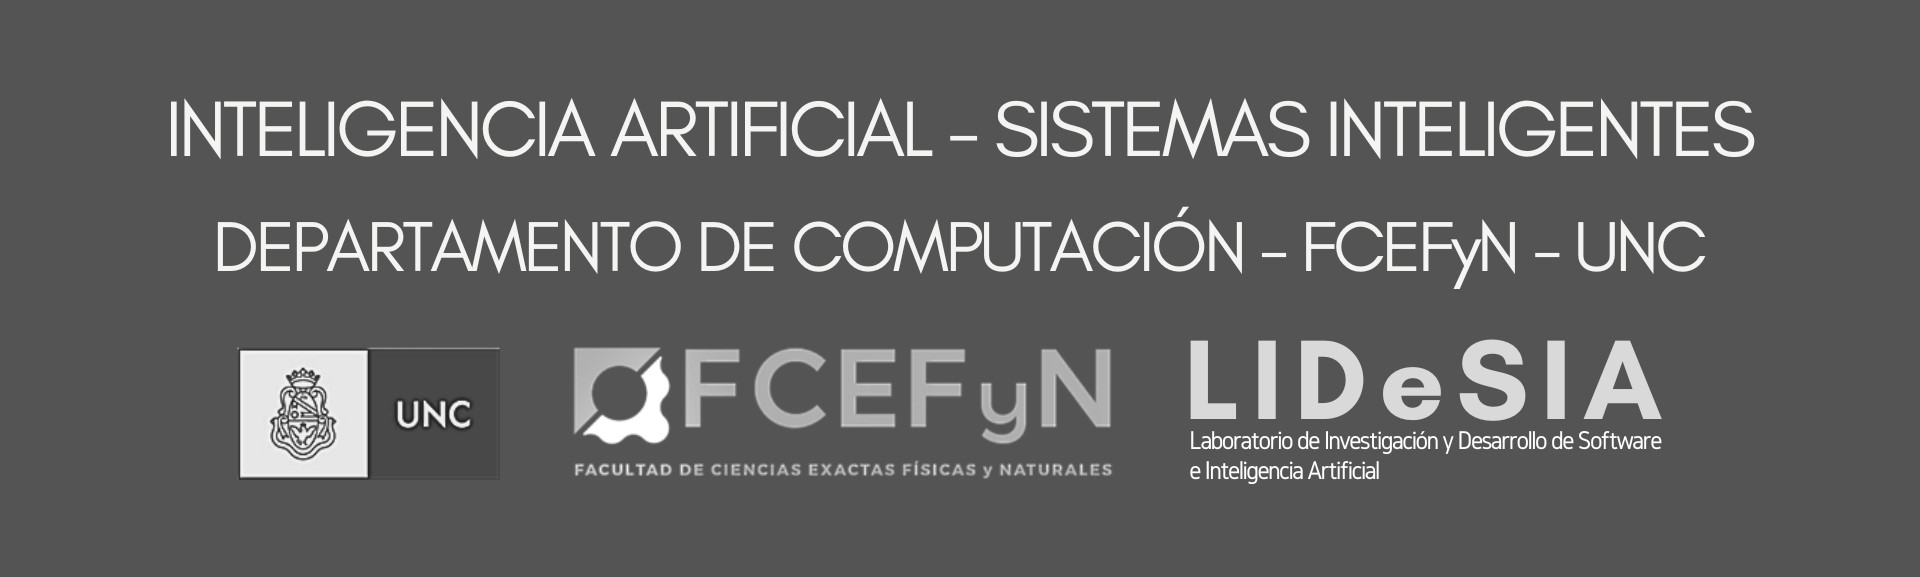

#Regresión lineal y logistica
---


FCEFyN - UNC - Cátedra de Inteligencia Artificial

##Regresión Lineal

Cargando las librerias

In [ ]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns

Cargando la base de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Curacion de dataset crudo
raw_df=pd.read_csv('/content/drive/Shareddrives/Tp_Inteligencia_Artificial/Grupo_IA/COLABS_FINALES/Primer_Parcial/dataset_primer_parcial/Seguro.csv')

In [ ]:
raw_df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [ ]:
raw_df.info()
#Ya está curada

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
seguro=raw_df

In [ ]:
seguro = seguro.astype({"sex":"category"})
seguro = seguro.astype({"smoker":"category"})
seguro = seguro.astype({"region":"category"})
seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


##Revisar

In [ ]:
# reviso las cols no numéricas
print("Sex:", seguro.sex.unique())
print("smoker:", seguro.smoker.unique())
print("region:", seguro.region.unique())


Sex: ['female', 'male']
Categories (2, object): ['female', 'male']
smoker: ['yes', 'no']
Categories (2, object): ['no', 'yes']
region: ['southwest', 'southeast', 'northwest', 'northeast']
Categories (4, object): ['northeast', 'northwest', 'southeast', 'southwest']


In [ ]:
# # codificación de variables
# sex_labels = {'female': 0, 'male': 1}
# smoker_labels = {'yes': 1, 'no': 0} # notar cómo respeto el orden
# sex_labels

In [ ]:
# # codifico
# seguro.sex = seguro.sex.map(sex_labels)
# seguro.smoker = seguro.smoker.map(smoker_labels)
# seguro=seguro.drop(['region'], axis=1)
# seguro.head()

##Prueba

Definiendo input y target

In [ ]:
seguro=seguro.drop(['region','sex','smoker'], axis=1)
seguro.head()

age     bmi  children      charges
0   19  27.900         0  16884.92400
1   18  33.770         1   1725.55230
2   28  33.000         3   4449.46200
3   33  22.705         0  21984.47061
4   32  28.880         0   3866.85520

In [ ]:
target=np.array(seguro.charges)
data_input = seguro.drop(columns= ['charges'])
input=np.array(data_input)

In [ ]:
input

array([[19.  , 27.9 ,  0.  ],
       [18.  , 33.77,  1.  ],
       [28.  , 33.  ,  3.  ],
       ...,
       [18.  , 36.85,  0.  ],
       [21.  , 25.8 ,  0.  ],
       [61.  , 29.07,  0.  ]])

In [ ]:
target

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (input, target, test_size= 0.2, random_state=42)

In [ ]:
print("X_train:", X_train.shape)
print("X_test:",X_test.shape)
print("input:",input.shape)
print()
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)
print("target:",target.shape)

X_train: (1070, 3)
X_test: (268, 3)
input: (1338, 3)

y_train: (1070,)
y_test: (268,)
target: (1338,)


Importando el modelo

In [ ]:
from sklearn import linear_model

In [ ]:
reg=linear_model.LinearRegression()

In [ ]:
reg.fit(X_train,y_train)

LinearRegression()

Coeficiente e intersección

In [ ]:
reg.coef_

array([220.75776541, 332.20247584, 563.01943242])

In [ ]:
reg.intercept_

-6118.046178106704

Hacemos nuestra prediccion:

In [ ]:
predict=reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mean_squared_error(y_test, predict)

131201335.64669806

In [ ]:
reg.score(X_train, y_train)

0.10987471044767094

Un R2∼1 indica un buen ajuste de los datos

Testeamos:

In [ ]:
print("Datos Input:", X_test[3]) #Inputs
print("Costo del seguro: ", y_test[3]) #Humedad real
test1 = reg.predict ([X_test[3]]) #Humedad prediccion
print("Prediccion: ", int(test1)) #Humedad prediccion

Datos Input: [46.    25.745  3.   ]
Costo del seguro:  9301.89355
Prediccion:  14278


##Regresión Logistica

$$P(y |x, \beta) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 \cdot x)}}$$



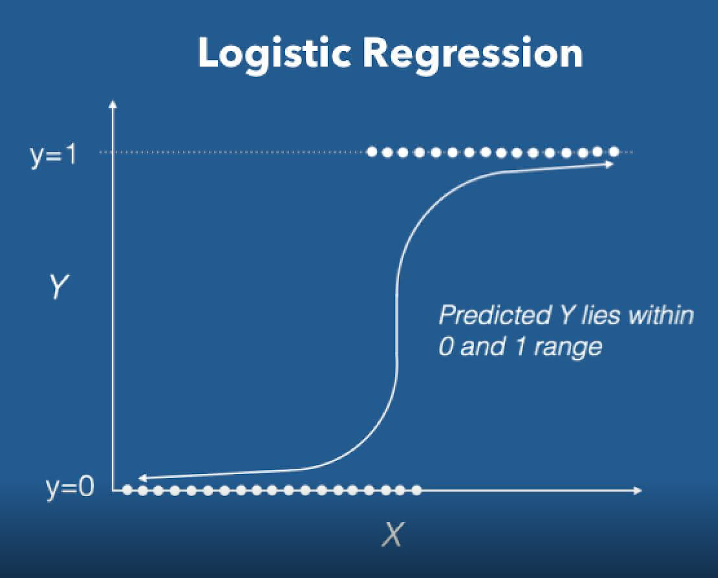

### Vamos a hacer un predictor de si hoy va a llover o no

In [ ]:
curada = pd.read_csv('/content/drive/Shareddrives/Tp_Inteligencia_Artificial/Grupo IA/COLABS_FINALES/Primer_Parcial/dataset_primer_parcial/Copia de clima_curada.csv')

In [ ]:
curada

MinTemp  MaxTemp  Rainfall  Evaporation WindDir3pm  WindSpeed3pm  \
0        8.0     24.3       0.0          3.4         NW            20   
1       14.0     26.9       3.6          4.4          W            17   
2       13.7     23.4       3.6          5.8        NNE             6   
3       13.3     15.5      39.8          7.2          W            24   
4        7.6     16.1       2.8          5.6        ESE            28   
..       ...      ...       ...          ...        ...           ...   
361      9.0     30.7       0.0          7.6         NW            50   
362      7.1     28.4       0.0         11.6        NNW            19   
363     12.5     19.9       0.0          8.4        ENE             9   
364     12.5     26.9       0.0          5.0        WNW            28   
365     12.3     30.2       0.0          6.0        WNW            35   

     Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0             68           29       1019.7       1015.0         7         7   
1             80           36       1012.4       1008.4         5         3   
2             82           69       1009.5       1007.2         8         7   
3             62           56       1005.5       1007.0         2         7   
4             68           49       1018.3       1018.5         7         7   
..           ...          ...          ...          ...       ...       ...   
361           38           15       1016.1       1010.8         1         3   
362           45           22       1020.0       1016.9         0         1   
363           63           47       1024.0       1022.8         3         2   
364           69           39       1021.0       1016.2         6         7   
365           43           13       1009.6       1009.2         1         1   

     Temp9am  Temp3pm RainToday  RISK_MM RainTomorrow  sunshine  windspeed  \
0       14.4     23.6        No      3.6          Yes       6.3       30.0   
1       17.5     25.7       Yes      3.6          Yes       9.7       39.0   
2       15.4     20.2       Yes     39.8          Yes       3.3       85.0   
3       13.5     14.1       Yes      2.8          Yes       9.1       54.0   
4       11.1     15.4       Yes      0.0           No      10.6       50.0   
..       ...      ...       ...      ...          ...       ...        ...   
361     20.4     30.0        No      0.0           No      12.1       76.0   
362     17.2     28.2        No      0.0           No      12.7       48.0   
363     14.5     18.3        No      0.0           No       5.3       43.0   
364     15.8     25.9        No      0.0           No       7.1       46.0   
365     23.8     28.6        No      0.0           No      12.6       78.0   

     speed9am  
0         6.0  
1         4.0  
2         6.0  
3        30.0  
4        20.0  
..        ...  
361       7.0  
362       2.0  
363      11.0  
364       6.0  
365      31.0  

[366 rows x 20 columns]

In [ ]:
curada_v1=pd.get_dummies(curada, columns=['WindDir3pm'])

In [ ]:
curada_v1 #One hot encoding

MinTemp  MaxTemp  Rainfall  Evaporation  WindSpeed3pm  Humidity9am  \
0        8.0     24.3       0.0          3.4            20           68   
1       14.0     26.9       3.6          4.4            17           80   
2       13.7     23.4       3.6          5.8             6           82   
3       13.3     15.5      39.8          7.2            24           62   
4        7.6     16.1       2.8          5.6            28           68   
..       ...      ...       ...          ...           ...          ...   
361      9.0     30.7       0.0          7.6            50           38   
362      7.1     28.4       0.0         11.6            19           45   
363     12.5     19.9       0.0          8.4             9           63   
364     12.5     26.9       0.0          5.0            28           69   
365     12.3     30.2       0.0          6.0            35           43   

     Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  ...  WindDir3pm_NNW  \
0             29       1019.7       1015.0         7  ...               0   
1             36       1012.4       1008.4         5  ...               0   
2             69       1009.5       1007.2         8  ...               0   
3             56       1005.5       1007.0         2  ...               0   
4             49       1018.3       1018.5         7  ...               0   
..           ...          ...          ...       ...  ...             ...   
361           15       1016.1       1010.8         1  ...               0   
362           22       1020.0       1016.9         0  ...               1   
363           47       1024.0       1022.8         3  ...               0   
364           39       1021.0       1016.2         6  ...               0   
365           13       1009.6       1009.2         1  ...               0   

     WindDir3pm_NW  WindDir3pm_S WindDir3pm_SE  WindDir3pm_SSE WindDir3pm_SSW  \
0                1             0             0               0              0   
1                0             0             0               0              0   
2                0             0             0               0              0   
3                0             0             0               0              0   
4                0             0             0               0              0   
..             ...           ...           ...             ...            ...   
361              1             0             0               0              0   
362              0             0             0               0              0   
363              0             0             0               0              0   
364              0             0             0               0              0   
365              0             0             0               0              0   

     WindDir3pm_SW  WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  
0                0             0               0               0  
1                0             1               0               0  
2                0             0               0               0  
3                0             1               0               0  
4                0             0               0               0  
..             ...           ...             ...             ...  
361              0             0               0               0  
362              0             0               0               0  
363              0             0               0               0  
364              0             0               1               0  
365              0             0               1               0  

[366 rows x 35 columns]

In [ ]:
curada_v2=curada_v1.drop(columns=['RainTomorrow'])
curada_v2

MinTemp  MaxTemp  Rainfall  Evaporation  WindSpeed3pm  Humidity9am  \
0        8.0     24.3       0.0          3.4            20           68   
1       14.0     26.9       3.6          4.4            17           80   
2       13.7     23.4       3.6          5.8             6           82   
3       13.3     15.5      39.8          7.2            24           62   
4        7.6     16.1       2.8          5.6            28           68   
..       ...      ...       ...          ...           ...          ...   
361      9.0     30.7       0.0          7.6            50           38   
362      7.1     28.4       0.0         11.6            19           45   
363     12.5     19.9       0.0          8.4             9           63   
364     12.5     26.9       0.0          5.0            28           69   
365     12.3     30.2       0.0          6.0            35           43   

     Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  ...  WindDir3pm_NNW  \
0             29       1019.7       1015.0         7  ...               0   
1             36       1012.4       1008.4         5  ...               0   
2             69       1009.5       1007.2         8  ...               0   
3             56       1005.5       1007.0         2  ...               0   
4             49       1018.3       1018.5         7  ...               0   
..           ...          ...          ...       ...  ...             ...   
361           15       1016.1       1010.8         1  ...               0   
362           22       1020.0       1016.9         0  ...               1   
363           47       1024.0       1022.8         3  ...               0   
364           39       1021.0       1016.2         6  ...               0   
365           13       1009.6       1009.2         1  ...               0   

     WindDir3pm_NW  WindDir3pm_S WindDir3pm_SE  WindDir3pm_SSE  \
0                1             0             0               0   
1                0             0             0               0   
2                0             0             0               0   
3                0             0             0               0   
4                0             0             0               0   
..             ...           ...           ...             ...   
361              1             0             0               0   
362              0             0             0               0   
363              0             0             0               0   
364              0             0             0               0   
365              0             0             0               0   

     WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  WindDir3pm_WNW  \
0                 0              0             0               0   
1                 0              0             1               0   
2                 0              0             0               0   
3                 0              0             1               0   
4                 0              0             0               0   
..              ...            ...           ...             ...   
361               0              0             0               0   
362               0              0             0               0   
363               0              0             0               0   
364               0              0             0               1   
365               0              0             0               1   

     WindDir3pm_WSW  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
..              ...  
361               0  
362               0  
363               0  
364               0  
365               0  

[366 rows x 34 columns]

In [ ]:
inputs=curada_v2.drop(columns=['RainToday'])
target=np.array(curada_v2['RainToday'])

In [ ]:
inputs=np.array(inputs)
inputs

array([[ 8. , 24.3,  0. , ...,  0. ,  0. ,  0. ],
       [14. , 26.9,  3.6, ...,  1. ,  0. ,  0. ],
       [13.7, 23.4,  3.6, ...,  0. ,  0. ,  0. ],
       ...,
       [12.5, 19.9,  0. , ...,  0. ,  0. ,  0. ],
       [12.5, 26.9,  0. , ...,  0. ,  1. ,  0. ],
       [12.3, 30.2,  0. , ...,  0. ,  1. ,  0. ]])

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
input_minmax = min_max_scaler.fit_transform(inputs)

In [ ]:
input_minmax

array([[0.50763359, 0.59219858, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73664122, 0.68439716, 0.09045226, ..., 1.        , 0.        ,
        0.        ],
       [0.72519084, 0.56028369, 0.09045226, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.67938931, 0.43617021, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.67938931, 0.68439716, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.67175573, 0.80141844, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
target

array(['No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No'

In [ ]:
curada_v2 = curada_v2.replace ({"RainToday": {"Yes": 1}})
curada_v2 = curada_v2.replace ({"RainToday": {"No": 0}})
target = curada_v2 ["RainToday"]

In [ ]:
target

0      0
1      1
2      1
3      1
4      1
      ..
361    0
362    0
363    0
364    0
365    0
Name: RainToday, Length: 366, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
train_inputs, test_inputs, train_target, test_target= train_test_split(input_minmax, target, test_size= 0.2, random_state=42)

In [ ]:
print('train inputs', train_inputs.shape)
print('train target', train_target.shape)
print('test inputs', test_inputs.shape)
print('test target', test_target.shape)

train inputs (292, 33)
train target (292,)
test inputs (74, 33)
test target (74,)


In [ ]:
reglog=LogisticRegression()

In [ ]:
reglog.fit(train_inputs, train_target)

LogisticRegression()

In [ ]:
pred= reglog.predict(test_inputs)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy=accuracy_score(test_target, pred)
accuracy

0.8513513513513513

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm=confusion_matrix(test_target,pred)

In [ ]:
cm

array([[58,  0],
       [11,  5]])

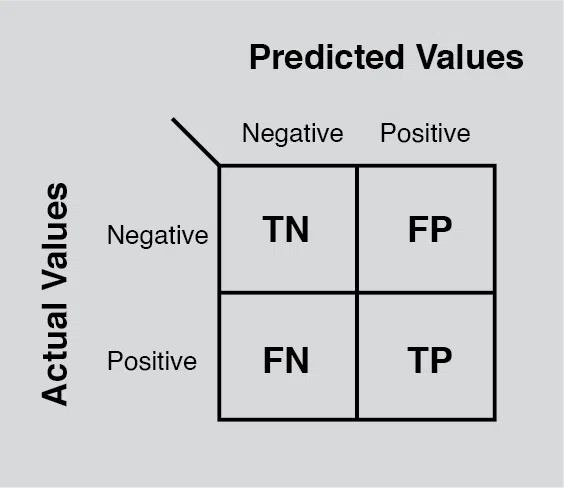

In [ ]:
accuracy

0.8513513513513513

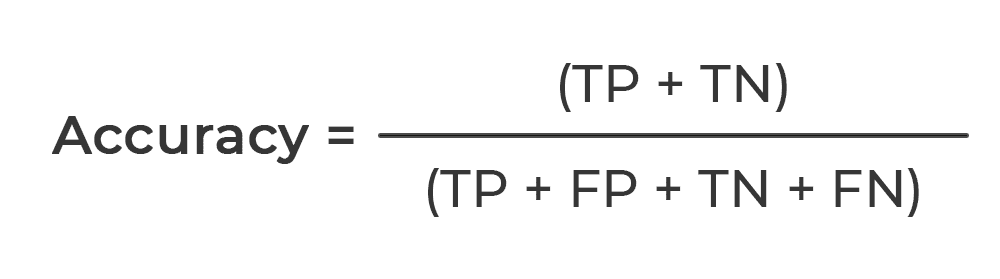

In [ ]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
test_target

193    0
33     1
15     0
310    0
57     1
      ..
82     0
94     0
192    0
307    0
211    0
Name: RainToday, Length: 74, dtype: int64

Ojo con esto:

In [ ]:
prueba = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])
prueba

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
accuracy_prueba =accuracy_score(test_target, prueba)
accuracy_prueba

0.7837837837837838